# Paper 3 - plotting

In [1]:
%pylab inline

#from matplotlib.colors import LogNorm
#import astropy.units as u

Populating the interactive namespace from numpy and matplotlib


In [2]:
import h5py
#import mentari_v2 as mtr
import os

/apps/skylake/software/mpi/gcc/6.4.0/openmpi/3.0.0/h5py/2.7.1-python-3.6.4-serial/lib/python3.6/site-packages/h5py-2.7.1-py3.6-linux-x86_64.egg/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from random import sample, seed
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=73, Om0=0.25)

In [4]:
Hubble_h = 0.73
#BoxSize = ((62.5**3) * (1/8))**(1/3)
BoxSize = ((500**3) * (4/512))**(1/3)
#BoxSize = ((1000**3) * (1000/1000))**(1/3)
#BoxSize = ((250**3) * (1/125))**(1/3)
print(BoxSize)
dilute = 5000
sSFRcut = -11.0

hubble=0.73
volume = (BoxSize/Hubble_h)**3

99.21256574801244


In [5]:
#directory = '../sage/src/auxdata/trees/full-default/'
directory = 'save-stellar-DTG/'
#directory1 = '../src/auxdata/trees/no-SNII/'
filename = 'model'
redshift = [127.000, 79.998, 50.000, 30.000, 19.916, 18.244, 16.725, 15.343, 14.086, 12.941, 11.897, 10.944, 10.073, 9.278, 8.550, 7.883, 7.272, 6.712, 6.197, 5.724, 5.289, 4.888, 4.520, 4.179, 3.866, 3.576, 3.308, 3.060, 2.831, 2.619, 2.422, 2.239, 2.070, 1.913, 1.766, 1.630, 1.504, 1.386, 1.276, 1.173, 1.078, 0.989, 0.905, 0.828, 0.755, 0.687, 0.624, 0.564, 0.509, 0.457, 0.408, 0.362, 0.320, 0.280, 0.242, 0.208, 0.175, 0.144, 0.116, 0.089, 0.064, 0.041, 0.020, 0.000]
redshift.reverse()
#age = cosmo.age(redshift).value
lbtime = cosmo.lookback_time(redshift).value
#redshift = [0.000, 1.386, 2.070, 3.060, 4.179, 5.289, 6.197, 7.272] #millennium 
#redshift = [0.024, 1.309, 2.051, 3.033, 4.088, 5.127, 6.044, 7.098] #genesis
#redshift = [0.000, 1.379, 2.028, 3.060, 4.043, 5.161, 6.231, 7.313] #bolshoi
#redshift = [0.000]
#redshift = [0.000, 1.321, 2.028, 3.037, 4.038, 5.150, 6.022, 7.026] #MDPL
firstfile = 0
lastfile = 0
MaxTreeFiles = lastfile - firstfile + 1
#print(lbtime)

In [ ]:
def galdtype():
	# Define the data-type for the public version of SAGE
	Galdesc_full = [
        ('SnapNum'                      , np.int32),
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('SAGEHaloIndex'                , np.int32),
        ('SAGETreeIndex'                , np.int32),
        ('SimulationHaloIndex'          , np.int64),
        ('mergeType'                    , np.int32),
        ('mergeIntoID'                  , np.int32),
        ('mergeIntoSnapNum'             , np.int32),
        ('dT'                           , np.float32),
        ('Pos'                          , (np.float32, 3)),
        ('Vel'                          , (np.float32, 3)),
        ('Spin'                         , (np.float32, 3)),
        ('Len'                          , np.int32),
        ('Mvir'                         , np.float32),
        ('CentralMvir'                  , np.float32),
        ('Rvir'                         , np.float32),
        ('Vvir'                         , np.float32),
        ('Vmax'                         , np.float32),
        ('VelDisp'                      , np.float32),
        ('ColdGas'                      , np.float32),
        ('f_H2'                         , np.float32),
        ('f_HI'                         , np.float32),
        ('cf'                           , np.float32),
        ('Zp'                           , np.float32),
        ('Pressure'                     , np.float32),
        ('StellarMass'                  , np.float32),
        ('BulgeMass'                    , np.float32),
        ('HotGas'                       , np.float32),
        ('EjectedMass'                  , np.float32),
        ('BlackHoleMass'                , np.float32),
        ('IntraClusterStars'            , np.float32),
        ('MetalsColdGas'                , np.float32),
        ('MetalsStellarMass'            , np.float32),
        ('MetalsBulgeMass'              , np.float32),
        ('MetalsHotGas'                 , np.float32),
        ('MetalsEjectedMass'            , np.float32),
        ('MetalsIntraClusterStars'      , np.float32),
        ('ColdDust'                     , np.float32),
        ('HotDust'                      , np.float32),
        ('EjectedDust'                     , np.float32),
        ('SfrDisk'                      , np.float32),
        ('SfrBulge'                     , np.float32),
        ('SfrDiskZ'                     , np.float32),
        ('SfrBulgeZ'                    , np.float32),
        ('dustdotform'                  , np.float32),
        ('dustdotgrowth'                    , np.float32),
        ('dustdotdestruct'                    , np.float32),
#        ('Sfr'                          , (np.float32, 64)),
        ('DiskRadius'                   , np.float32),
        ('Cooling'                      , np.float32),
        ('Heating'                      , np.float32),
        ('QuasarModeBHaccretionMass'    , np.float32),
        ('TimeOfLastMajorMerger'         , np.float32),
        ('TimeOfLastMinorMerger'         , np.float32),
        ('OutflowRate'                  , np.float32),
        ('infallMvir'                   , np.float32),
        ('infallVvir'                   , np.float32),
        ('infallVmax'                   , np.float32)
        ]
	names = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
	formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
	Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
	return Galdesc

In [ ]:
def read_one_file(name, Galdesc):
    fin = open(name, 'rb')
    Ntrees = np.fromfile(fin,np.dtype(np.int32),1)[0]
    NtotGals = np.fromfile(fin,np.dtype(np.int32),1)[0]
    GalsPerTree = np.fromfile(fin, np.dtype((np.int32, Ntrees)),1)[0]
    G = np.fromfile(fin, Galdesc, NtotGals)
    G = G.view(recarray)
    return G

In [ ]:
Galdesc = galdtype()


G_history = [0]*len(redshift)
#G_history1 = [0]*len(redshift)
for i in range(len(redshift)):
    G_snap = []
#    G_snap1 = []
#    G_snap2 = []
    GalsTree = []
    
    for k in range(firstfile, lastfile+1):
        name = (directory+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{k}')
        G = read_one_file(name, Galdesc)
        G_snap.extend(G)
        
        '''
        name1 = (directory1+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{k}')
        G1 = read_one_file(name1, Galdesc)
        G_snap1.extend(G)
        '''
    G_snap = np.array(G_snap)
    G_snap = G_snap.view(recarray)
    
    #G_snap1 = np.array(G_snap1)
    #G_snap1 = G_snap1.view(recarray)
    
    G_history[i] = G_snap
    #G_history1[i] = G_snap1

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 500
matplotlib.rcParams.update({'errorbar.capsize': 2})
matplotlib.rcParams.update({'font.size': 12})
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

## Histories of spiral galaxies

In [ ]:
zticks = [0, 0.2, 0.5, 1, 2, 4]
lbticks = [cosmo.lookback_time(z).value for z in zticks]

#selection 
stellarmass = G_history[0].StellarMass * 1.e10 / Hubble_h
bulge = G_history[0].BulgeMass * 1.e10 / Hubble_h
sfr = G_history[0].SfrDisk + G_history[0].SfrBulge
dustmass = G_history[0].ColdDust * 1.e10 / Hubble_h
w = np.where((stellarmass > 5.8e10) & (stellarmass < 1e11) & (bulge/stellarmass > 0.35) & (bulge/stellarmass < 0.4) & (sfr > 0))[0]

ax = plt.figure()  # New figure
ID = G_history[0].GalaxyIndex[w[0:4]]

for i in range(len(ID)):
    sfh = []
    zfh = []
    
    for j in range(len(G_history)):
        if len(G_history[j]) == 0:
            sfh.append(0.0)
            zfh.append(0.0)
            
        else:
            w = np.where(G_history[j].GalaxyIndex == ID[i])[0]
            if len(w) == 0:
                sfh.append(0.0)
                zfh.append(0.0)
            else:
                sfh.extend(G_history[j].SfrDisk[w] + G_history[j].SfrBulge[w])
                zfh.extend(G_history[j].MetalsStellarMass[w] / G_history[j].StellarMass[w])
                
    ax = plt.subplot(211)  # 1 plot on the figure
    ax.plot(lbtime, np.array(sfh), lw=1.0)
    
    ax1 = plt.subplot(212)
    ax1.plot(lbtime, np.array(zfh), lw=1.0)

# Set the x and y axis minor ticks
ax.set_xticklabels([])
ax.set_ylabel(r'SFR (M$_{\odot}$/yr)', fontsize=16)
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
ax.set_xlim(0, 13.99)
ax.set_ylim(0, 35)
lookbackticks = ax.get_xticks()

ax2 = ax.twiny()
ax2.set_xlim(0, 13.99)
ax2.set_xticks(lbticks)
ax2.set_xticklabels(['{:g}'.format(z) for z in zticks])
ax2.set_xlabel(r'Redshift', fontsize=16)

ax2.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax2.tick_params(axis='both', which='major', labelsize=12)

ax1.set_xlabel(r'Lookback time (Gyr)', fontsize=16)
ax1.set_ylabel(r'Metallicity', fontsize=16)
ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax1.yaxis.set_minor_locator(plt.MultipleLocator(0.002))
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', direction='in')
ax1.tick_params(axis='both', which='minor', direction='in')
ax1.set_xlim(0, 13.99)
ax1.set_ylim(0, 0.02)

plt.tight_layout()
plt.subplots_adjust(hspace=0)
#plt.savefig('plots/historyspiral.png')

## Histories of elliptical galaxies

In [ ]:
zticks = [0, 0.2, 0.5, 1, 2, 4]
lbticks = [cosmo.lookback_time(z).value for z in zticks]

#selection 
stellarmass = G_history[0].StellarMass * 1.e10 / Hubble_h
bulge = G_history[0].BulgeMass * 1.e10 / Hubble_h
sfr = G_history[0].SfrDisk + G_history[0].SfrBulge
dustmass = G_history[0].ColdDust * 1.e10 / Hubble_h
w = np.where((stellarmass > 1e10) & (bulge/stellarmass > 0.8) & (sfr == 0))[0]

plt.figure()  # New figure
ID = G_history[0].GalaxyIndex[w[0:9]]

for i in range(len(ID)):
    sfh = []
    zfh = []
    
    for j in range(len(G_history)):
        if len(G_history[j]) == 0:
            sfh.append(0.0)
            zfh.append(0.0)
            
        else:
            w = np.where(G_history[j].GalaxyIndex == ID[i])[0]
            if len(w) == 0:
                sfh.append(0.0)
                zfh.append(0.0)
            else:
                sfh.extend(G_history[j].SfrDisk[w] + G_history[j].SfrBulge[w])
                zfh.extend(G_history[j].MetalsStellarMass[w] / G_history[j].StellarMass[w])
                
    ax = plt.subplot(211)  # 1 plot on the figure
    ax.plot(lbtime, np.array(sfh), lw=1.0)
    
    ax1 = plt.subplot(212)
    ax1.plot(lbtime, np.array(zfh), lw=1.0)

# Set the x and y axis minor ticks
ax.set_xticklabels([])
ax.set_ylabel(r'SFR (M$_{\odot}$/yr)', fontsize=16)
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
ax.set_xlim(0, 13.99)
ax.set_ylim(0, 35)
lookbackticks = ax.get_xticks()

ax2 = ax.twiny()
ax2.set_xlim(0, 13.99)
ax2.set_xticks(lbticks)
ax2.set_xticklabels(['{:g}'.format(z) for z in zticks])
ax2.set_xlabel(r'Redshift', fontsize=16)

ax2.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax2.tick_params(axis='both', which='major', labelsize=12)

ax1.set_xlabel(r'Lookback time (Gyr)', fontsize=16)
ax1.set_ylabel(r'Metallicity', fontsize=16)
ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax1.yaxis.set_minor_locator(plt.MultipleLocator(0.002))
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', direction='in')
ax1.tick_params(axis='both', which='minor', direction='in')
ax1.set_xlim(0, 13.99)
ax1.set_ylim(0, 0.02)

plt.tight_layout()
plt.subplots_adjust(hspace=0)
#plt.savefig('plots/historyelliptical.png')

## SFH of selected normal and elliptical galaxies

In [ ]:
zticks = [0, 0.2, 0.5, 1, 2, 4]
lbticks = [cosmo.lookback_time(z).value for z in zticks]

#selection 
stellarmass = G_history[0].StellarMass * 1.e10 / Hubble_h
bulge = G_history[0].BulgeMass * 1.e10 / Hubble_h
sfr = G_history[0].SfrDisk + G_history[0].SfrBulge
dustmass = G_history[0].ColdDust * 1.e10 / Hubble_h
w_s = np.where((stellarmass > 6e10) & (stellarmass < 1e11) &(bulge/stellarmass > 0.35) & (bulge/stellarmass < 0.4) & (sfr > 0))[0]
w_e = np.where((stellarmass > 1e10) & (bulge/stellarmass > 0.8) & (sfr == 0))[0]

fig = plt.figure()  # New figure
ID_s = G_history[0].GalaxyIndex[w_s[0:9]]
ID_e = G_history[0].GalaxyIndex[w_e[0:9]]

for i in range(len(ID_s)):
    sfh_s = []
    sfh_e = []
    
    for j in range(len(G_history)):
        if len(G_history[j]) == 0:
            sfh_s.append(0.0) 
            sfh_e.append(0.0) 
        else:
            w = np.where(G_history[j].GalaxyIndex == ID_s[i])[0]
            if len(w) == 0:
                sfh_s.append(0.0)
            else:
                sfh_s.extend(G_history[j].SfrDisk[w] + G_history[j].SfrBulge[w])
            
            w_e = np.where(G_history[j].GalaxyIndex == ID_e[i])[0]
            if len(w_e) == 0:
                sfh_e.append(0.0)
            else:
                sfh_e.extend(G_history[j].SfrDisk[w_e] + G_history[j].SfrBulge[w_e])
            
            
    ax = plt.subplot(211)  # 1 plot on the figure
    ax.plot(lbtime, (np.array(sfh_s)), lw=1.0)
    
    ax1 = plt.subplot(212)  # 1 plot on the figure
    ax1.plot(lbtime, (np.array(sfh_e)), lw=1.0)
            

# Set the x and y axis minor ticks
ax.set_xticklabels([])
#ax.set_ylabel(r'SFR (M$_{\odot}$/yr)', fontsize=16)
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
ax.set_xlim(0, 13.99)
#ax.set_ylim(0, 70)
lookbackticks = ax.get_xticks()

ax2 = ax.twiny()
ax2.set_xlim(0, 13.99)
ax2.set_xticks(lbticks)
ax2.set_xticklabels(['{:g}'.format(z) for z in zticks])
ax2.set_xlabel(r'Redshift', fontsize=16)

ax2.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax2.tick_params(axis='both', which='major', labelsize=12)

#ax1.set_ylabel(r'SFR (M$_{\odot}$/yr)', fontsize=16)
ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax1.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', direction='in')
ax1.tick_params(axis='both', which='minor', direction='in')
ax1.set_xlim(0, 13.99)
#ax1.set_ylim(0, 70)
ax1.set_xlabel(r'Lookback time (Gyr)', fontsize=16)

#fig.text(0.7, 0.53, 'Spiral')
#fig.text(0.7, 0.15, 'Elliptical')
#fig.text(0.04, 0.4, r'$\mathrm{log_{10}}$ SFR (M$_{\odot}$/yr)', fontsize=16, rotation=90)
fig.text(0.15, 0.83, 'Spiral')
fig.text(0.15, 0.45, 'Elliptical')
fig.text(0.04, 0.4, r'SFR (M$_{\odot}$/yr)', fontsize=16, rotation=90)

plt.subplots_adjust(hspace=0)

plt.savefig('plots/history.png')

## Mass history

In [ ]:
%pylab inline
import h5py
import mentari_v2 as mtr

In [ ]:
def age_to_lookback(age): #age in Gyr, lookback in yr
    
    '''
    Convert age of Universe to lookback time
    Input: age (list(float)) -- age of universe, in Gyr
    Output: lookback time (list(float)) -- corresponding lookback time, in yr
    '''
    lookback = (np.array([13.6098]*len(age)) - age) * 1.e9
    return lookback

In [ ]:
directory_dusty = "../dusty-sage/src/auxdata/trees/save-stellar-DTG/"
snap_limit = 63
BoxSize = ((62.5**3) * (1/8))**(1/3) #mini-millennium
firstfile = 1
lastfile = 1
Hubble_h = 0.73

In [ ]:
mass_dusty, metals_dusty = mtr.build_mass_and_metallicity_history(1, directory_dusty, firstfile, lastfile, snap_limit)

In [ ]:
age = np.asarray([0.0124, 0.0246, 0.0491, 0.1037, 0.1871, 0.2120, 0.2399, 0.2709, 0.3054, 0.3438, 0.3864, 0.4335, 0.4856, 0.5430, 0.6062, 0.6756, 0.7517, 0.8349, 0.9259, 1.0249, 1.1327, 1.2496, 1.3763, 1.5131, 1.6606, 1.8192, 1.9895, 2.1717, 2.3662, 2.5734, 2.7934, 3.0265, 3.2726, 3.5318, 3.8038, 4.0886, 4.3856, 4.6944, 5.0144, 5.3488, 5.6849, 6.0337, 6.3901, 6.7531, 7.1215, 7.4940, 7.8694, 8.2464, 8.6238, 9.0004, 9.3750, 9.7463, 10.1133, 10.4750, 10.8303, 11.1783, 11.5181, 11.8490, 12.1702, 12.4811, 12.7810, 13.0695, 13.3459, 13.6098])
lookbacktime = sorted((np.array([13.6098]*len(age)) - age) * 1.e9)

In [ ]:
f = open("files/bc2003_hr_m22_chab_ssp.ised_ASCII", "r")
M1 = []
for elem in f.read().split():
    try:
        M1.append(float(elem))
    except ValueError:
        pass
f.close()

In [ ]:
lookback = M1[1:222]
wavelength = M1[236: 7136]
metallicity = [0.0001, 0.0004, 0.004, 0.008, 0.02, 0.05]
#ZZ = [M1, M2, M3, M4, M5, M6]
time_grid = 221
wave_grid = 6900

In [ ]:
gal_number = len(mass_dusty)
new_mass_hist = np.zeros((time_grid, gal_number))
new_metal_hist = np.zeros((time_grid, gal_number))

In [ ]:
for i in range(gal_number):
    lookbacktime = age_to_lookback(age)
    sorted_lbtime = sorted(lookbacktime)
    
    temp_mass_list = list(mass_dusty[i])
    temp_metal_list = list(metals_dusty[i])
    temp_mass_list.reverse()
    temp_metal_list.reverse()
    new_mass_hist[:,i] = np.interp(lookback, sorted_lbtime, temp_mass_list) 
    new_metal_hist[:,i] = np.interp(lookback, sorted_lbtime, temp_metal_list)

In [ ]:
Z_ID = np.zeros_like(new_metal_hist)
t1, m1 = np.where((new_metal_hist <= metallicity[0]) & (new_metal_hist < (metallicity[0] + metallicity[1])/2))
t2, m2 = np.where((new_metal_hist > (metallicity[0] + metallicity[1])/2) & (new_metal_hist <= (metallicity[1] + metallicity[2])/2))
t3, m3 = np.where((new_metal_hist > (metallicity[1] + metallicity[2])/2) & (new_metal_hist <= (metallicity[2] + metallicity[3])/2))
t4, m4 = np.where((new_metal_hist > (metallicity[2] + metallicity[3])/2) & (new_metal_hist <= (metallicity[3] + metallicity[4])/2))
t5, m5 = np.where((new_metal_hist > (metallicity[3] + metallicity[4])/2) & (new_metal_hist <= (metallicity[4] + metallicity[5])/2))
t6, m6 = np.where(new_metal_hist > (metallicity[4] + metallicity[5])/2)

Z_ID[t1, m1] = 0
Z_ID[t2, m2] = 1
Z_ID[t3, m3] = 2
Z_ID[t4, m4] = 3
Z_ID[t5, m5] = 4
Z_ID[t6, m6] = 5

n_metal_hist = np.zeros_like(new_metal_hist)
n_metal_hist[t1, m1] = metallicity[0]
n_metal_hist[t2, m2] = metallicity[1]
n_metal_hist[t3, m3] = metallicity[2]
n_metal_hist[t4, m4] = metallicity[3]
n_metal_hist[t5, m5] = metallicity[4]
n_metal_hist[t6, m6] = metallicity[5]

In [ ]:
(mass_dusty[1])

In [ ]:
#Plot Metal History for a random galaxy

zticks = [0, 0.2, 0.5, 1, 2, 4]
lbticks = [cosmo.lookback_time(z).value for z in zticks]

plt.figure()  # New figure
ax = plt.subplot(212)
for i in range(len(metallicity)):
    ax.axhline(y=metallicity[i],color='black', linestyle='-', lw=0.2)
 
ax.plot(np.array(lookbacktime)/1.e9, metals_dusty[1], 'b.-', label='metal history', lw=0.5)
#ax.plot(np.array(lookback)/1.e9, new_metal_hist[:,1], '.-', label='interpolated metal history', lw=0.5)
ax.plot(np.array(lookback)/1.e9, n_metal_hist[:,1], 'r.-', label='grid metal history', lw=0.5)
ax.set_xlabel(r'Lookback Time (Gyr)', fontsize=16)
ax.set_ylabel(r'Metallicity ($\mathrm{Z_\odot}$)', fontsize=12)
ax.legend(loc=0)

ax1 = plt.subplot(211)
ax1.plot(np.array(lookbacktime)/1.e9, np.log10(mass_dusty[1]), 'b.-', label='mass history', lw=0.5)
ax1.plot(np.array(lookback)/1.e9, np.log10(new_mass_hist[:,1]), 'r.-', label='interpolated mass history', lw=0.5)
ax1.legend(loc='lower left')
ax1.set_ylabel(r'$\mathrm{log_{10}}$ Stellar Mass ($\mathrm{M_\odot}$)', fontsize=12)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
ax.set_xlim(0, 13.99)

ax2 = ax1.twiny()
ax2.set_xlim(0, 13.99)
ax2.set_xticks(lbticks)
ax2.set_xticklabels(['{:g}'.format(z) for z in zticks])
ax2.set_xlabel(r'Redshift', fontsize=16)

ax2.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax2.tick_params(axis='both', which='major', labelsize=12)

ax1.set_xticklabels([])
ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax1.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', direction='in')
ax1.tick_params(axis='both', which='minor', direction='in')
ax1.set_xlim(0, 13.99)

plt.subplots_adjust(hspace=0)
plt.savefig('plots/history-individual.png')

## Comparison of Dale+ 14 and Safarzadeh +16 templates

In [ ]:
snap_limit = 63
dust, gas_metals, gas, rad  = mtr.build_dust_history(1, directory_dusty, firstfile, lastfile, snap_limit)

In [ ]:
w = np.where((mass_dusty[:,snap_limit] > 0) & (dust[:,snap_limit] > 0))[0]
Mass = mass_dusty[w] / Hubble_h 
Metals = metals_dusty[w]

Dust = dust[w,snap_limit] / Hubble_h
Gas = gas[w,snap_limit] / Hubble_h
Rad = rad[w,snap_limit] / Hubble_h

tau_BC, eta_BC, tau_ISM, eta_ISM = mtr.compute_attenuation_parameters (1, Dust, Gas, Rad)

In [ ]:
Age = np.asarray([0.0124, 0.0246, 0.0491, 0.1037, 0.1871, 0.2120, 0.2399, 0.2709, 0.3054, 0.3438, 0.3864, 0.4335, 0.4856, 0.5430, 0.6062, 0.6756, 0.7517, 0.8349, 0.9259, 1.0249, 1.1327, 1.2496, 1.3763, 1.5131, 1.6606, 1.8192, 1.9895, 2.1717, 2.3662, 2.5734, 2.7934, 3.0265, 3.2726, 3.5318, 3.8038, 4.0886, 4.3856, 4.6944, 5.0144, 5.3488, 5.6849, 6.0337, 6.3901, 6.7531, 7.1215, 7.4940, 7.8694, 8.2464, 8.6238, 9.0004, 9.3750, 9.7463, 10.1133, 10.4750, 10.8303, 11.1783, 11.5181, 11.8490, 12.1702, 12.4811, 12.7810, 13.0695, 13.3459, 13.6098])
lookbacktime = sorted((np.array([13.6098]*len(Age)) - Age) * 1.e9)
time_BC = 10**7

In [ ]:
wavelength, spectra, spectra_dusty = mtr.generate_SED(1, Age, Mass, Metals, 
             tau_BC, tau_ISM, eta_BC, eta_ISM, time_BC)

In [ ]:
Ldust = (spectra - spectra_dusty)
w = np.where(wavelength < 912)[0]
idx_912 = w[-1]
LIR = []

for i in range(len(Ldust)):
    LIR_mentari = trapz(Ldust[i][idx_912:-1], wavelength[idx_912:-1])
    LIR.append(LIR_mentari)
LIR = np.array(LIR)    

In [ ]:
w_low = np.where((LIR > 0.9e9) & (LIR <1.2e9))[0]
w_mid = np.where((LIR > 0.9e10) & (LIR < 1.2e10))[0]
w_hi =  np.where((LIR > 0.9e11) & (LIR < 1.2e11))[0]

In [ ]:
LIR_low = (LIR[w_low[3]])
LIR_mid = (LIR[w_mid[1]])
LIR_hi = (LIR[w_hi[0]])

In [ ]:
#We want to find galaxies with comparable dust to stellar mass ratio
Dust[w_low[3]]/Mass[w_low[3],63] , Dust[w_mid[1]]/Mass[w_mid[1],63], Dust[w_hi[0]]/Mass[w_hi[0],63] 

In [ ]:
Mdust_low = Dust[w_low[3]]
Mdust_mid = Dust[w_mid[1]]
Mdust_hi = Dust[w_hi[0]]

In [ ]:
idx_low = mtr.determine_idx_Rieke(LIR_low)
idx_mid = mtr.determine_idx_Rieke(LIR_mid)
idx_hi = mtr.determine_idx_Rieke(LIR_hi)

In [ ]:
def IR_dale(LIR):
    Dale_template = np.loadtxt('files/spectra.0.00AGN.dat', unpack=True)
    lambda_IR = Dale_template[0] * 1e4 #convert from micron to Angstrom

    idx = mtr.determine_idx_Rieke(LIR)
    spectra_IR = 10 ** Dale_template[idx[0]+1] 

    LIR_dale = trapz(spectra_IR, lambda_IR)
    scaling = LIR / LIR_dale
    spectra_IR_dale = spectra_IR * scaling 
    
    return lambda_IR, spectra_IR_dale

In [ ]:
lambda_low, IR_dale_low = IR_dale(LIR_low)
lambda_mid, IR_dale_mid = IR_dale(LIR_mid)
lambda_hi, IR_dale_hi = IR_dale(LIR_hi)

In [ ]:
wave_low, IR_s_low = mtr.find_template_SUNRISE(np.log10(LIR_low), np.log10(Mdust_low))
wave_mid, IR_s_mid = mtr.find_template_SUNRISE(np.log10(LIR_mid), np.log10(Mdust_mid))
wave_hi, IR_s_hi = mtr.find_template_SUNRISE(np.log10(LIR_hi), np.log10(Mdust_hi))

In [ ]:
wave_sunrise = np.array([wave_low, wave_mid, wave_hi]) * 1.e4
FIR_sunrise = np.array([IR_s_low, IR_s_mid, IR_s_hi]) / wave_sunrise
lambda_dale = np.array([lambda_low, lambda_mid, lambda_hi])
IR_dale = np.array([IR_dale_low, IR_dale_mid, IR_dale_hi])

In [ ]:
lambda_sunrise, IR_sunrise = mtr.combine_Dale_SUNRISE(wave_sunrise[0], FIR_sunrise, lambda_low, IR_dale)

In [ ]:
wave_sunrise = wave_low * 1e4
w = np.where(lambda_low < wave_sunrise[0])
all_wave = np.unique(np.concatenate((lambda_low[w], wave_sunrise)))
all_wave.sort(kind='mergesort')

new_spec = np.zeros((len(all_wave)))
w = np.where((all_wave < wave_sunrise[0]) | (all_wave == wave_sunrise[0]))[0]
MIR = np.interp(all_wave[w], lambda_low, IR_dale_low)
new_spec[w] = MIR
w = np.where(all_wave > wave_sunrise[0])[0]
new_spec[i,w] = np.interp(all_wave[w], wavelength_sunrise, spectra_sunrise[i])

In [ ]:
fig = plt.figure(figsize = (10, 3))

ax = plt.subplot(131)
ax.plot(lambda_low, IR_dale_low * lambda_low, label='Dale+ 14')
ax.plot(wave_low * 1e4, IR_s_low, label='Safarzadeh+ 16')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(2e4, 5e6)
ax.set_ylim(1e5, 1e11)
ax.legend(loc=0)
ax.tick_params(axis='both', which='both', direction='in')
ax.tick_params(axis='y', which='minor')
ax.set_ylabel(r'Luminosity ($\mathrm{L}_\odot$)', fontsize=16)
              
ax1 = plt.subplot(132)
ax1.plot(lambda_mid, IR_dale_mid * lambda_mid)
ax1.plot(wave_mid * 1e4, IR_s_mid)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(2e4, 5e6)
ax1.set_ylim(1e5, 1e11)
ax1.tick_params(axis='both', which='both', direction='in')
ax1.set_yticklabels([])
ax1.tick_params(axis='y', which='minor')

ax2 = plt.subplot(133)
ax2.plot(lambda_hi, IR_dale_hi * lambda_hi)
ax2.plot(wave_hi * 1e4, IR_s_hi)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim(2e4, 5e6)
ax2.set_ylim(1e5, 1e11)
ax2.tick_params(axis='both', which='both', direction='in')
ax2.set_yticklabels([])

ax2.tick_params(axis='both', which='minor')
plt.subplots_adjust(wspace=0, hspace=0)

fig.text(0.5, 0.0, r'$\lambda (\AA)$', fontsize=16)
fig.text(0.13, 0.8, r'$\mathrm{LIR} = 10^9\ \mathrm{L}_\odot$', fontsize=12)
fig.text(0.39, 0.8, r'$\mathrm{LIR} = 10^{10}\ \mathrm{L}_\odot$', fontsize=12)
fig.text(0.65, 0.8, r'$\mathrm{LIR} = 10^{11}\ \mathrm{L}_\odot$', fontsize=12)
plt.savefig('IR.png')

# z=0 LFs

## Read mAB

In [8]:
GALEX_FUV_m1 = []
GALEX_FUV_m2 = []
GALEX_FUV_m3 = []
GALEX_FUV_m4 = []
GALEX_NUV_m1 = []
GALEX_NUV_m2 = []
GALEX_NUV_m3 = []
GALEX_NUV_m4 = []
IRAC_1_m1 = []
IRAC_1_m2 = []
IRAC_1_m3 = []
IRAC_1_m4 = []
IRAC_2_m1 = []
IRAC_2_m2 = []
IRAC_2_m3 = []
IRAC_2_m4 = []
IRAC_3_m1 = []
IRAC_3_m2 = []
IRAC_3_m3 = []
IRAC_3_m4 = []
IRAC_4_m1 = []
IRAC_4_m2 = []
IRAC_4_m3 = []
IRAC_4_m4 = []
MIPS_24um_m1 = []
MIPS_24um_m2 = []
MIPS_24um_m3 = []
MIPS_24um_m4 = []
PACS_160um_m1 = []
PACS_160um_m2 = []
PACS_160um_m3 = []
PACS_160um_m4 = []
PACS_70um_m1 = []
PACS_70um_m2 = []
PACS_70um_m3 = []
PACS_70um_m4 = []
SCUBA_850WB_m1 = []
SCUBA_850WB_m2 = []
SCUBA_850WB_m3 = []
SCUBA_850WB_m4 = []
SPIRE_250um_m1 = []
SPIRE_250um_m2 = []
SPIRE_250um_m3 = []
SPIRE_250um_m4 = []
SPIRE_350um_m1 = []
SPIRE_350um_m2 = []
SPIRE_350um_m3 = []
SPIRE_350um_m4 = []
SPIRE_500um_m1 = []
SPIRE_500um_m2 = []
SPIRE_500um_m3 = []
SPIRE_500um_m4 = []
Sdss_g_m1 = []
Sdss_g_m2 = []
Sdss_g_m3 = []
Sdss_g_m4 = []
Sdss_i_m1 = []
Sdss_i_m2 = []
Sdss_i_m3 = []
Sdss_i_m4 = []
Sdss_r_m1 = []
Sdss_r_m2 = []
Sdss_r_m3 = []
Sdss_r_m4 = []
Sdss_u_m1 = []
Sdss_u_m2 = []
Sdss_u_m3 = []
Sdss_u_m4 = []
Sdss_z_m1 = []
Sdss_z_m2 = []
Sdss_z_m3 = []
Sdss_z_m4 = []
TwoMass_Ks_m1 = []
TwoMass_Ks_m2 = []
TwoMass_Ks_m3 = []
TwoMass_Ks_m4 = []
VIRCAM_K_m1 = []
VIRCAM_K_m2 = []
VIRCAM_K_m3 = []
VIRCAM_K_m4 = []

m = [[GALEX_FUV_m1, GALEX_FUV_m2, GALEX_FUV_m3, GALEX_FUV_m4],
    [GALEX_NUV_m1, GALEX_NUV_m2, GALEX_NUV_m3, GALEX_NUV_m4],
    [TwoMass_Ks_m1, TwoMass_Ks_m2, TwoMass_Ks_m3, TwoMass_Ks_m4],
    [VIRCAM_K_m1, VIRCAM_K_m2, VIRCAM_K_m3, VIRCAM_K_m4],
    [Sdss_u_m1, Sdss_u_m2, Sdss_u_m3, Sdss_u_m4],
    [Sdss_g_m1, Sdss_g_m2, Sdss_g_m3, Sdss_g_m4],
    [Sdss_r_m1, Sdss_r_m2, Sdss_r_m3, Sdss_r_m4],
    [Sdss_i_m1, Sdss_i_m2, Sdss_i_m3, Sdss_i_m4],
    [Sdss_z_m1, Sdss_z_m2, Sdss_z_m3 ,Sdss_z_m4],
    [IRAC_1_m1, IRAC_1_m2, IRAC_1_m3, IRAC_1_m4],
    [IRAC_2_m1, IRAC_2_m2, IRAC_2_m3, IRAC_2_m4],
    [IRAC_3_m1, IRAC_3_m2, IRAC_3_m3, IRAC_3_m4],
    [IRAC_4_m1, IRAC_4_m2, IRAC_4_m3, IRAC_4_m4],
    [MIPS_24um_m1, MIPS_24um_m2, MIPS_24um_m3, MIPS_24um_m4],
    [PACS_70um_m1, PACS_70um_m2, PACS_70um_m3, PACS_70um_m4],
    [PACS_160um_m1, PACS_160um_m2, PACS_160um_m3, PACS_160um_m4],
    [SPIRE_250um_m1, SPIRE_250um_m2, SPIRE_250um_m3, SPIRE_250um_m4],
    [SPIRE_350um_m1, SPIRE_350um_m2, SPIRE_350um_m3, SPIRE_350um_m4],
    [SPIRE_500um_m1, SPIRE_500um_m2, SPIRE_500um_m3, SPIRE_500um_m4],
    [SCUBA_850WB_m1, SCUBA_850WB_m2, SCUBA_850WB_m3, SCUBA_850WB_m4]]

filter_list = ['GALEX_FUV', 'GALEX_NUV', 'TwoMass_Ks', 'VIRCAM_K', 'Sdss_u', 
              'Sdss_g', 'Sdss_r', 'Sdss_i', 'Sdss_z', 'IRAC_1', 'IRAC_2',
              'IRAC_3', 'IRAC_4', 'MIPS_24um', 'PACS_70um', 'PACS_160um',
               'SPIRE_250um', 'SPIRE_350um', 'SPIRE_500um', 'SCUBA_850WB']

dirname = 'output-test/'
filename = 'mentari_mag_0.0_'
ext = '.hdf5'
firstfile = 0
lastfile = 3

for i in range(firstfile, lastfile+1):
    file = dirname + filename + str(i) + ext
    print(file)
    with h5py.File(file, 'r') as f:
        m1 = f['default']
        m2 = f['SUNRISE']
        m3 = f['Somerville']
        m4 = f['CF00']
        for j in range(len(filter_list)):
            m[j][0].extend(m1[j])
            m[j][1].extend(m2[j])
            m[j][2].extend(m3[j])
            m[j][3].extend(m4[j])
        

output-test/mentari_mag_0.0_0.hdf5
output-test/mentari_mag_0.0_1.hdf5
output-test/mentari_mag_0.0_2.hdf5
output-test/mentari_mag_0.0_3.hdf5


In [9]:
hubble=0.73
volume = (BoxSize/Hubble_h)**3

## Plot UV LF

0
1


/apps/skylake/software/compiler/gcc/6.4.0/matplotlib/2.2.2-python-3.6.4/lib/python3.6/site-packages/matplotlib-2.2.2-py3.6-linux-x86_64.egg/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


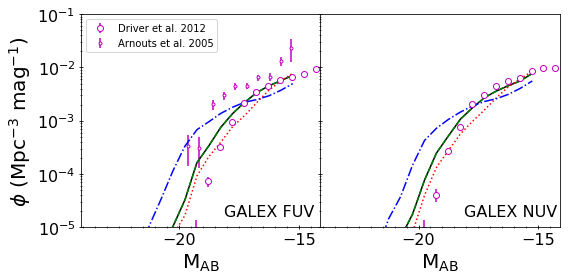

In [10]:
label = ['GALEX FUV', 'GALEX NUV']
mi = -30.0
ma = -15.0
binwidth = 0.5
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

row = 1
col = 2
fig, axes = plt.subplots(row, col, sharey=True, figsize=(8,4))

for i in range(0, 2):
    print(i)
    ax =plt.subplot(row, col, i+1)
    
    counts, binedges = np.histogram(m[i][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
    
    counts, binedges = np.histogram(m[i][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5)
    
    counts, binedges = np.histogram(m[i][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5)
    
    counts, binedges = np.histogram(m[i][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.5)

    plt.yscale('log', nonposy='clip')
    plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20)  # Set the y...
    plt.xlabel(r'$\mathrm{M_{AB}}$', fontsize=20)
    plt.xlim([-24.1, -14.1])
    plt.ylim([1e-5, 1e-1])
    plt.annotate(label[i], xy=(0.6, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', direction='inout')
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))


plt.subplot(121)
FUV_x, FUV_y, FUV_err, FUV_N = np.loadtxt('data_obs/LF1500_driver_12.txt', unpack=True)
plt.errorbar(FUV_x+5.0*np.log10(Hubble_h)+0.65, FUV_y*2*Hubble_h*Hubble_h*Hubble_h, FUV_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white', ls = 'none', label='Driver et al. 2012')

h0=0.7
mag, phi, e_phiup, e_philow = np.loadtxt('data_obs/LFUV_z0-3_Arnouts_05.txt', usecols=(0,1,2,3), unpack=True)
y = 10**phi[0:10]
ydn = y - (10**(phi[0:10] - e_philow[0:10]))
yup = (10**(phi[0:10] + e_phiup[0:10])) - y

plt.errorbar(mag[0:10], y, yerr=[ydn, yup], marker='.', color='m', mfc='white', ls = 'none', label='Arnouts et al. 2005')
plt.legend(loc=0)

plt.subplot(122).set_ylabel('')
plt.subplot(122).set_yticklabels([])
NUV_x, NUV_y, NUV_err, NUV_N = np.loadtxt('data_obs/LF2300_driver_12.txt', unpack=True)
plt.errorbar(NUV_x+5.0*np.log10(Hubble_h)+0.65, NUV_y*2*Hubble_h*Hubble_h*Hubble_h, NUV_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white', ls = 'none', label='Driver et al. 2012')

plt.tight_layout()
plt.subplots_adjust(wspace=0)
#plt.savefig('plots/LF_UV_4files.png')


## K-band LF and SDSS

/apps/skylake/software/compiler/gcc/6.4.0/matplotlib/2.2.2-python-3.6.4/lib/python3.6/site-packages/matplotlib-2.2.2-py3.6-linux-x86_64.egg/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


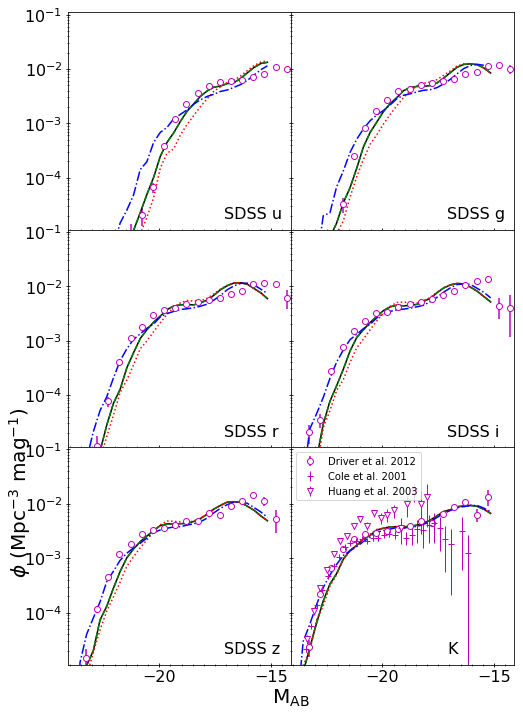

In [11]:
mi = -30.0
ma = -15.0
binwidth = 0.3
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.01)

label = ['SDSS u', 'SDSS g', 'SDSS r', 'SDSS i', 'SDSS z', 'K']
row = 3
col = 2

#index = [16, 13, 15, 14, 17, 18]
index = [4, 5, 6, 7, 8, 3]
Mstar = np.array([0, -18.53, -20.28, -20.90, -21.45, -21.78])
alpha1 = [0, -0.91, -1.29, -1.13, -1.35, -1.46]
phistar1 = [0, 0.00964, 0.00351, 0.00451, 0.00220, 0.0014]
alpha2 = [0, 1.25, 0.06, 0.53, -0.09, -0.26]
phistar2 = [0, 0.00146, 0.00488, 0.00301, 0.00487, 0.00505]

fig, axes = plt.subplots(row, col, sharey=True, figsize = (8, 12))
for i in np.arange(0,6):
    
    ax =plt.subplot(row, col, i+1)
    
    counts, binedges = np.histogram(m[index[i]][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.5)
    
    plt.yscale('log', nonposy='clip')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    plt.xlim([-24.1, -14.1])
    plt.ylim([1.1e-5, 1.1e-1])
    plt.annotate(label[i], xy=(0.7, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', direction='inout')
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

    
plt.subplot(321).set_xticklabels([])
u_x, u_y, u_err, u_N = np.loadtxt('data_obs/LFu_driver_12.txt', unpack=True)
plt.errorbar(u_x+5.0*np.log10(Hubble_h)+0.65, u_y*2*Hubble_h*Hubble_h*Hubble_h, u_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white', ls = 'none', label='Driver et al. 2012')
#plt.legend(loc=0)

u_mag, u_phi, u_errlow, e_errup = np.loadtxt('data_obs/LFu_kelvin_14.txt', unpack=True)
#plt.errorbar(u_mag, u_phi*Hubble_h*Hubble_h*Hubble_h, marker='.', lw=1.0, ls = 'none', label='Kelvin et al. 2014')

M_plot = M  #convert back to Chabrier IMF
xval = 10.0 ** (0.4*(Mstar[1] - M)) 
yval = 0.4 * np.log(10.0) * (phistar1[1] * xval ** (alpha1[1]+1) + phistar2[1] * xval ** (alpha2[1]+1)) * np.exp(-xval)
#plt.plot(M_plot, yval, 'g--', lw=1.5, label='Kelvin+ 13')

#plt.legend(loc=0)

plt.subplot(322).set_xticklabels([])
plt.subplot(322).set_yticklabels([])
g_x, g_y, g_err, g_N = np.loadtxt('data_obs/LFg_driver_12.txt', unpack=True)
plt.errorbar(g_x+5.0*np.log10(Hubble_h)+0.65, g_y*2*Hubble_h*Hubble_h*Hubble_h, g_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white', ls = 'none', label='Driver et al. 2012')

plt.subplot(323).set_xticklabels([])
r_x, r_y, r_err, r_N = np.loadtxt('data_obs/LFr_driver_12.txt', unpack=True)
plt.errorbar(r_x+5.0*np.log10(Hubble_h)+0.65, r_y*2*Hubble_h*Hubble_h*Hubble_h, r_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o',  color='m', mfc='white',ls = 'none', label='Driver et al. 2012')

plt.subplot(324).set_xticklabels([])
plt.subplot(324).set_yticklabels([])
i_x, i_y, i_err, i_N = np.loadtxt('data_obs/LFi_driver_12.txt', unpack=True)
plt.errorbar(i_x+5.0*np.log10(Hubble_h)+0.65, i_y*2*Hubble_h*Hubble_h*Hubble_h, i_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white', ls = 'none', label='Driver et al. 2012')

plt.subplot(325)
z_x, z_y, z_err, z_N = np.loadtxt('data_obs/LFz_driver_12.txt', unpack=True)
plt.errorbar(z_x+5.0*np.log10(Hubble_h)+0.65, z_y*2*Hubble_h*Hubble_h*Hubble_h, z_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white',ls = 'none', label='Driver et al. 2012')

plt.subplot(326).set_yticklabels([])
k_x, k_y, k_err, k_N = np.loadtxt('data_obs/LFk_driver_12.txt', unpack=True)
plt.errorbar(k_x+5.0*np.log10(Hubble_h)+0.65, k_y*2*Hubble_h*Hubble_h*Hubble_h, k_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white', ls = 'none', label='Driver et al. 2012')

# Cole et al. 2001 K band 2dFGRS LF
Cole_Phi = np.array([3.1315561E-03, 8.2625253E-03, 0.0000000E+00, 4.6483092E-03, 5.7576019E-03, 9.1649834E-03, 1.1232893E-02,
            1.0536440E-02, 8.5763102E-03, 8.8181989E-03, 6.9448259E-03, 6.0896124E-03, 9.2596142E-03, 6.9631678E-03,
            7.2867479E-03, 6.9923755E-03, 5.9844730E-03, 5.9305103E-03, 5.3865365E-03, 5.8525647E-03, 5.2373926E-03,
            4.9635037E-03, 4.1801766E-03, 2.7171015E-03, 1.8800517E-03, 1.2136410E-03, 6.5419916E-04, 3.4594961E-04,
            1.4771589E-04, 5.5521199E-05, 2.1283222E-05, 9.4211919E-06, 1.0871951E-06, 2.7923562E-07])
Cole_PhiErr = np.array([3.6377162E-03, 6.6833422E-03, 1.0000000E-10, 4.0996978E-03, 4.3155681E-03, 5.6722397E-03, 6.4211683E-03,
            5.7120644E-03, 4.6346937E-03, 3.8633577E-03, 2.4383855E-03, 1.6279118E-03, 1.6941463E-03, 1.1781409E-03,
            9.7785855E-04, 7.9027453E-04, 6.0649612E-04, 5.1598746E-04, 4.2267537E-04, 3.7395130E-04, 2.8177485E-04,
            2.1805518E-04, 1.6829016E-04, 1.1366483E-04, 8.1871600E-05, 5.7472309E-05, 3.6554517E-05, 2.3141622E-05,
            1.2801432E-05, 6.5092854E-06, 3.3540452E-06, 1.9559407E-06, 5.6035748E-07, 2.8150106E-07])
Cole_Mag = np.array([-18.00000, -18.25000, -18.50000, -18.75000, -19.00000, -19.25000, -19.50000, -19.75000, -20.00000,
            -20.25000, -20.50000, -20.75000, -21.00000, -21.25000, -21.50000, -21.75000, -22.00000, -22.25000,
            -22.50000, -22.75000, -23.00000, -23.25000, -23.50000, -23.75000, -24.00000, -24.25000, -24.50000,
            -24.75000, -25.00000, -25.25000, -25.50000, -25.75000, -26.00000, -26.25000])

# Huang et al. 2003 K band Hawaii+AAO LF
Huang_Phi = np.array([0.0347093, 0.0252148, 0.0437980, 0.0250516, 0.00939655, 0.0193473, 0.0162743, 0.0142267, 0.0174460,
            0.0100971, 0.0136507, 0.00994688, 0.00655286, 0.00528234, 0.00310017, 0.00157789, 0.000721131,
            0.000272634, 8.33409e-05, 2.12150e-05, 3.97432e-06, 5.07697e-06, 5.42939e-07])
Huang_PhiErr = np.array([ 0.0249755, 0.0181685, 0.0161526, 0.0105895, 0.00479689, 0.00525068, 0.00428192, 0.00308970, 0.00248676,
            0.00166458, 0.00166691, 0.00106289, 0.000704721, 0.000527429, 0.000340814, 0.000170548, 8.25681e-05,
            3.81529e-05, 1.50279e-05, 6.16614e-06, 2.34362e-06, 1.98971e-06, 5.54946e-07])
Huang_Mag = np.array([-19.8000, -20.1000, -20.4000, -20.7000, -21.0000, -21.3000, -21.6000, -21.9000, -22.2000, -22.5000,
            -22.8000, -23.1000, -23.4000, -23.7000, -24.0000, -24.3000, -24.6000, -24.9000, -25.2000,
            -25.5000, -25.8000, -26.1000, -26.4000])

# Finally plot the observational data
Cole_xval = Cole_Mag + 0.65 #convert to Chabrier IMF
Huang_xval = Huang_Mag + 0.65 #convert to Chabrier IMF
plt.errorbar(Cole_xval+5.0*np.log10(Hubble_h)+1.85, Cole_Phi*Hubble_h*Hubble_h*Hubble_h, yerr=Cole_PhiErr*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='+', color='m', mfc='white', ls='none', label='Cole et al. 2001')
plt.errorbar(Huang_xval+5.0*np.log10(Hubble_h)+1.85, Huang_Phi*Hubble_h*Hubble_h*Hubble_h, yerr=Huang_PhiErr*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='v', color='m', mfc='white', ls='none', label='Huang et al. 2003')

plt.legend(loc='upper left')

fig.text(0.48, 0.08, r'$\mathrm{M_{AB}}$', fontsize=20)
fig.text(0.02, 0.4, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20, rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('plots/LF_optical_4files.png')


## MIR LF

/apps/skylake/software/compiler/gcc/6.4.0/matplotlib/2.2.2-python-3.6.4/lib/python3.6/site-packages/matplotlib-2.2.2-py3.6-linux-x86_64.egg/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


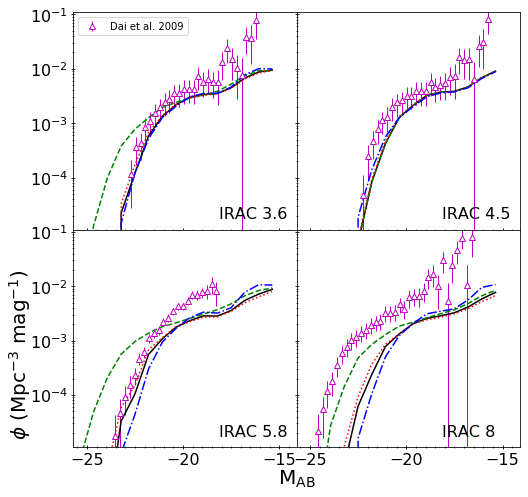

In [12]:
mi = -30.0
ma = -15.0
binwidth = 0.7
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.01)

band, mag, phi, e_phi = np.loadtxt('data_obs/LFirac_dai_09.txt', usecols=(0,1,2,3), unpack=True)

w = np.where(band == 3.6)[0]
mag_36 = mag[w]
phi_36 = phi[w]
ephi_36 = e_phi[w]

w = np.where(band == 4.5)[0]
mag_45 = mag[w]
phi_45 = phi[w]
ephi_45 = e_phi[w]

w = np.where(band == 5.8)[0]
mag_58 = mag[w]
phi_58 = phi[w]
ephi_58 = e_phi[w]

w = np.where(band == 8.0)[0]
mag_80 = mag[w]
phi_80 = phi[w]
ephi_80 = e_phi[w]

mag_list = [mag_36, mag_45, mag_58, mag_80]
phi_list = [phi_36, phi_45, phi_58, phi_80]
ephi_list = [ephi_36, ephi_45, ephi_58, ephi_80]
vegacorr = [2.79, 3.26, 3.73, 4.40] #From Gillian Wilson webpage

label = ['IRAC 3.6', 'IRAC 4.5', 'IRAC 5.8', 'IRAC 8']
row = 2
col = 2

#index = [2, 3, 4, 5]
index = [9, 10, 11, 12]

fig, axes = plt.subplots(row, col, sharey=True, figsize=(8,8))
for i in np.arange(0,4):
    
    ax =plt.subplot(row, col, i+1)

    
    counts, binedges = np.histogram(m[index[i]][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.5)

    #plot observational data from Dai+ 09
    plt.errorbar(mag_list[i]+vegacorr[i], phi_list[i]*Hubble_h*Hubble_h*Hubble_h, ephi_list[i]*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='^', color='m', mfc='white', ls='none',label='Dai et al. 2009')

    plt.yscale('log', nonposy='clip')
    ax.tick_params(direction='in')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    plt.xlim([-25.7, -14.1])
    plt.ylim([1.1e-5, 1.1e-1])
    plt.annotate(label[i], xy=(0.65, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', direction='inout')
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.subplot(221).set_xticklabels([])
plt.legend(loc='upper left')

plt.subplot(222).set_xticklabels([])
plt.subplot(222).set_yticklabels([])

plt.subplot(224).set_yticklabels([])

fig.text(0.48, 0.06, r'$\mathrm{M_{AB}}$', fontsize=20)
fig.text(0.01, 0.4, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20, rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('plots/LF_mir_4files.png')


## FIR LF

/apps/skylake/software/compiler/gcc/6.4.0/matplotlib/2.2.2-python-3.6.4/lib/python3.6/site-packages/matplotlib-2.2.2-py3.6-linux-x86_64.egg/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


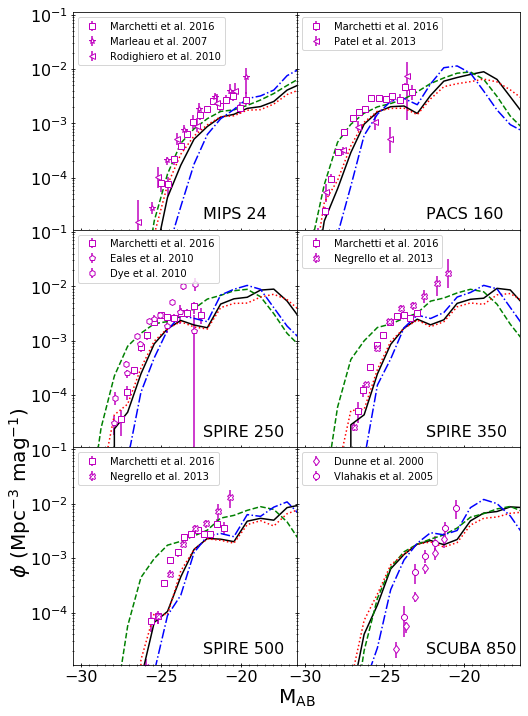

In [13]:
mi = -30.0
ma = -15.0
binwidth = 0.8
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.01)

label = ['MIPS 24', 'PACS 160', 'SPIRE 250', 'SPIRE 350', 'SPIRE 500', 'SCUBA 850']
row = 3
col = 2

#index = [6, 7, 10, 11, 12, 9]
index = [13, 15, 16, 17, 18, 19]

fig, axes = plt.subplots(row, col, sharey=True, figsize=(8,12))
for i in np.arange(0,6):
    
    ax =plt.subplot(row, col, i+1)

    
    counts, binedges = np.histogram(m[index[i]][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.5)
    
    plt.yscale('log', nonposy='clip')
    ax.tick_params(direction='in')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    plt.xlim([-30.5, -16.5])
    plt.ylim([1.1e-5, 1.1e-1])
    plt.annotate(label[i], xy=(0.58, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', direction='inout')
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.subplot(321).set_xticklabels([])
L, phi, philow, phiup = np.loadtxt('data_obs/LF_24.txt', unpack=True                                   )
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** L[0:14]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[0:14]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[0:14])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[0:14])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='s', color='m', mfc='white', ls = 'none', label = 'Marchetti et al. 2016')

Lum = (10 ** L[14:23]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[14:23]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[14:23])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[14:23])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='*', color='m', mfc='white', ls = 'none', label = 'Marleau et al. 2007')

Lum = (10 ** L[23:29]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[23:29]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[23:29])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[23:29])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='<', color='m', mfc='white', ls = 'none', label = 'Rodighiero et al. 2010')
plt.legend(loc='upper left')

plt.subplot(322).set_xticklabels([])
plt.subplot(322).set_yticklabels([])

x_m = np.array([-27.805, -27.307, -26.908, -26.545, -26.036, -25.603, -25.181, -24.930,
      -24.341, -23.840, -23.586, -23.146, -22.795, -22.332]) + 5.0*np.log10(Hubble_h)
y_m = np.array([-4.144, -3.558, -3.062, -2.673, -2.434, -2.338, -2.268,
                    -2.062, -2.086, -2.082, -2.047, -2.097, -1.853, -1.949])
ydn_m = np.array([-0.124, -0.079, 0, 0, 0, 0, 0, 0, 0, 0,
                             -0.111, -0.069, -0.11, -0.175])
yup_m =  np.array([0.074, 0.071, 0, 0, 0, 0, 0, 0, 0, 0,
                       0.055, 0.097, 0.043, 0.099])
ym_plot = (10 ** y_m) * Hubble_h*Hubble_h*Hubble_h

ydn = ym_plot - ((10**(y_m + ydn_m)) * Hubble_h*Hubble_h*Hubble_h)
yup = ((10**(y_m + yup_m)) * Hubble_h*Hubble_h*Hubble_h) - ym_plot
#plt.errorbar(x_m, ym_plot, yerr=[ydn, yup], c='k', marker='o', ls='none')

L, phi, philow, phiup = np.loadtxt('data_obs/LF_160.txt', unpack=True                                   )
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** L[0:14]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[0:14]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[0:14])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[0:14])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='s', color='m', mfc='white', ls = 'none', label = 'Marchetti et al. 2016')

Lum = (10 ** L[14:21]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[14:21]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[14:21])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[14:21])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='<', color='m', mfc='white', ls = 'none', label = 'Patel et al. 2013')
plt.legend(loc='upper left')

plt.subplot(323).set_xticklabels([])
L, phi, philow, phiup = np.loadtxt('data_obs/LF250_Marchetti_16.txt', unpack=True                                   )
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** L) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow)*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup)*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='s', color='m', mfc='white', ls = 'none', label = 'Marchetti et al. 2016')

L, phi, ephi= np.loadtxt('data_obs/LF250_eales_10.txt', unpack=True                                   )
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (L[0:8]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = phi[0:8]*Hubble_h*Hubble_h*Hubble_h
ydn = ephi[0:8]*Hubble_h*Hubble_h*Hubble_h
plt.errorbar(mag, y, yerr=ydn, marker ='p', color='m', mfc='white', ls = 'none', label = 'Eales et al. 2010')

L, phi, ephi= np.loadtxt('data_obs/LF250_dye_10.txt', unpack=True)
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2
H0 = 0.71
Lum = (L[0:8]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = phi[0:8]*(Hubble_h/(H0))**3
ydn = ephi[0:8]**(Hubble_h/(H0))**3
plt.errorbar(mag, y, yerr=ydn, marker ='h', color='m', mfc='white', ls = 'none', label = 'Dye et al. 2010')
plt.legend(loc='upper left')

plt.subplot(324).set_yticklabels([])
plt.subplot(324).set_xticklabels([])
L, phi, philow, phiup = np.loadtxt('data_obs/LF_350.txt', unpack=True)
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** L[0:10]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[0:10]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[0:10])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[0:10])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='s', color='m', mfc='white', ls = 'none', label = 'Marchetti et al. 2016')

Lum = (10 ** L[10:20]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[10:20]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[10:20])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[10:20])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='X', color='m', mfc='white',ls = 'none', label = 'Negrello et al. 2013')
plt.legend(loc='upper left')

plt.subplot(325)
L, phi, philow, phiup = np.loadtxt('data_obs/LF_500.txt', unpack=True)
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** L[0:12]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[0:12]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[0:12])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[0:12])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='s',  color='m', mfc='white',ls = 'none', label = 'Marchetti et al. 2016')

Lum = (10 ** L[12:21]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[12:21]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[12:21])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[12:21])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='X', color='m', mfc='white',ls = 'none', label = 'Negrello et al. 2013')
plt.legend(loc='upper left')

plt.subplot(326).set_yticklabels([])
H0 = 0.75
L, phi, philow = np.loadtxt('data_obs/LF850_dunne_00.txt', unpack=True)
tenpc2m = 3.086e+17
area = tenpc2m**2

Lum = (10 ** L) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = phi*(Hubble_h/H0)**3
ydn = philow*(Hubble_h/H0)**3
plt.errorbar(mag, y, yerr=ydn, marker ='d', color='m', mfc='white',ls = 'none', label = 'Dunne et al. 2000')

L, phi, philow = np.loadtxt('data_obs/LF850_vlahakis_05.txt', unpack=True)
tenpc2m = 3.086e+17
area = tenpc2m**2

Lum = (10 ** L) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = phi*(Hubble_h/H0)**3
ydn = philow*(Hubble_h/H0)**3
plt.errorbar(mag, y, yerr=ydn, marker ='8', color='m', mfc='white',ls = 'none', label = 'Vlahakis et al. 2005')
plt.legend(loc='upper left')

#fig.delaxes(axes[-1,-1]) 
fig.text(0.48, 0.08, r'$\mathrm{M_{AB}}$', fontsize=20)
fig.text(0.01, 0.4, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20, rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('plots/LF_FIR_files.png')

# z=0.5-3 LF

## Read mAB

In [ ]:
GALEX_FUV_m1_z0 = []
GALEX_FUV_m2_z0 = []
GALEX_FUV_m3_z0 = []
GALEX_FUV_m4_z0 = []
TwoMass_Ks_m1_z0 = []
TwoMass_Ks_m2_z0 = []
TwoMass_Ks_m3_z0 = []
TwoMass_Ks_m4_z0 = []
VIRCAM_K_m1_z0 = []
VIRCAM_K_m2_z0 = []
VIRCAM_K_m3_z0 = []
VIRCAM_K_m4_z0 = []
IRAC_4_m1_z0 = []
IRAC_4_m2_z0 = []
IRAC_4_m3_z0 = []
IRAC_4_m4_z0 = []
SPIRE_250um_m1_z0 = []
SPIRE_250um_m2_z0 = []
SPIRE_250um_m3_z0 = []
SPIRE_250um_m4_z0 = []

m_z0 = [[GALEX_FUV_m1_z0, GALEX_FUV_m2_z0, GALEX_FUV_m3_z0, GALEX_FUV_m4_z0],
    [TwoMass_Ks_m1_z0, TwoMass_Ks_m2_z0, TwoMass_Ks_m3_z0, TwoMass_Ks_m4_z0],
    [VIRCAM_K_m1_z0, VIRCAM_K_m2_z0, VIRCAM_K_m3_z0, VIRCAM_K_m4_z0],
    [IRAC_4_m1_z0, IRAC_4_m2_z0, IRAC_4_m3_z0, IRAC_4_m4_z0],
    [SPIRE_250um_m1_z0, SPIRE_250um_m2_z0, SPIRE_250um_m3_z0, SPIRE_250um_m4_z0]]

GALEX_FUV_m1_z1 = []
GALEX_FUV_m2_z1 = []
GALEX_FUV_m3_z1 = []
GALEX_FUV_m4_z1 = []
TwoMass_Ks_m1_z1 = []
TwoMass_Ks_m2_z1 = []
TwoMass_Ks_m3_z1 = []
TwoMass_Ks_m4_z1 = []
VIRCAM_K_m1_z1 = []
VIRCAM_K_m2_z1 = []
VIRCAM_K_m3_z1 = []
VIRCAM_K_m4_z1 = []
IRAC_4_m1_z1 = []
IRAC_4_m2_z1 = []
IRAC_4_m3_z1 = []
IRAC_4_m4_z1 = []
SPIRE_250um_m1_z1 = []
SPIRE_250um_m2_z1 = []
SPIRE_250um_m3_z1 = []
SPIRE_250um_m4_z1 = []

m_z1 = [[GALEX_FUV_m1_z1, GALEX_FUV_m2_z1, GALEX_FUV_m3_z1, GALEX_FUV_m4_z1],
    [TwoMass_Ks_m1_z1, TwoMass_Ks_m2_z1, TwoMass_Ks_m3_z1, TwoMass_Ks_m4_z1],
    [VIRCAM_K_m1_z1, VIRCAM_K_m2_z1, VIRCAM_K_m3_z1, VIRCAM_K_m4_z1],
    [IRAC_4_m1_z1, IRAC_4_m2_z1, IRAC_4_m3_z1, IRAC_4_m4_z1],
    [SPIRE_250um_m1_z1, SPIRE_250um_m2_z1, SPIRE_250um_m3_z1, SPIRE_250um_m4_z1]]

GALEX_FUV_m1_z2 = []
GALEX_FUV_m2_z2 = []
GALEX_FUV_m3_z2 = []
GALEX_FUV_m4_z2 = []
TwoMass_Ks_m1_z2 = []
TwoMass_Ks_m2_z2 = []
TwoMass_Ks_m3_z2 = []
TwoMass_Ks_m4_z2 = []
VIRCAM_K_m1_z2 = []
VIRCAM_K_m2_z2 = []
VIRCAM_K_m3_z2 = []
VIRCAM_K_m4_z2 = []
IRAC_4_m1_z2 = []
IRAC_4_m2_z2 = []
IRAC_4_m3_z2 = []
IRAC_4_m4_z2 = []
SPIRE_250um_m1_z2 = []
SPIRE_250um_m2_z2 = []
SPIRE_250um_m3_z2 = []
SPIRE_250um_m4_z2 = []

m_z2 = [[GALEX_FUV_m1_z2, GALEX_FUV_m2_z2, GALEX_FUV_m3_z2, GALEX_FUV_m4_z2],
    [TwoMass_Ks_m1_z2, TwoMass_Ks_m2_z2, TwoMass_Ks_m3_z2, TwoMass_Ks_m4_z2],
    [VIRCAM_K_m1_z2, VIRCAM_K_m2_z2, VIRCAM_K_m3_z2, VIRCAM_K_m4_z2],
    [IRAC_4_m1_z2, IRAC_4_m2_z2, IRAC_4_m3_z2, IRAC_4_m4_z2],
    [SPIRE_250um_m1_z2, SPIRE_250um_m2_z2, SPIRE_250um_m3_z2, SPIRE_250um_m4_z2]]

GALEX_FUV_m1_z3 = []
GALEX_FUV_m2_z3 = []
GALEX_FUV_m3_z3 = []
GALEX_FUV_m4_z3 = []
TwoMass_Ks_m1_z3 = []
TwoMass_Ks_m2_z3 = []
TwoMass_Ks_m3_z3 = []
TwoMass_Ks_m4_z3 = []
VIRCAM_K_m1_z3 = []
VIRCAM_K_m2_z3 = []
VIRCAM_K_m3_z3 = []
VIRCAM_K_m4_z3 = []
IRAC_4_m1_z3 = []
IRAC_4_m2_z3 = []
IRAC_4_m3_z3 = []
IRAC_4_m4_z3 = []
SPIRE_250um_m1_z3 = []
SPIRE_250um_m2_z3 = []
SPIRE_250um_m3_z3 = []
SPIRE_250um_m4_z3 = []

m_z3 = [[GALEX_FUV_m1_z3, GALEX_FUV_m2_z3, GALEX_FUV_m3_z3, GALEX_FUV_m4_z3],
    [TwoMass_Ks_m1_z3, TwoMass_Ks_m2_z3, TwoMass_Ks_m3_z3, TwoMass_Ks_m4_z3],
    [VIRCAM_K_m1_z3, VIRCAM_K_m2_z3, VIRCAM_K_m3_z3, VIRCAM_K_m4_z3],
    [IRAC_4_m1_z3, IRAC_4_m2_z3, IRAC_4_m3_z3, IRAC_4_m4_z3],
    [SPIRE_250um_m1_z3, SPIRE_250um_m2_z3, SPIRE_250um_m3_z3, SPIRE_250um_m4_z3]]

filter_list = ['GALEX_FUV', 'TwoMass_Ks', 'VIRCAM_K','IRAC_4','SPIRE_250um']

dirname = 'output/'
filename = 'mentari_mag_'
z = [0.5, 1.0, 2.0, 3.0]
ext = '.hdf5'
firstfile = 0
lastfile = 3
m = [m_z0, m_z1, m_z2, m_z3]

for k in range(len(z)):
    for i in range(firstfile, lastfile+1):
        file = dirname + filename + str(z[k]) + '_' + str(i) + ext
        print(file)
        with h5py.File(file, 'r') as f:
            m1 = f['default']
            m2 = f['SUNRISE']
            m3 = f['Somerville']
            m4 = f['CF00']
            for j in range(len(filter_list)):
                m[k][j][0].extend(m1[j])
                m[k][j][1].extend(m2[j])
                m[k][j][2].extend(m3[j])
                m[k][j][3].extend(m4[j])
       

## UV LF

In [ ]:
label = ['GALEX FUV']
z=[0.5, 1.0, 2.0, 3.0]
mi = -30.0
ma = -15.0
binwidth = 0.5
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

row = 2
col = 2
fig, axes = plt.subplots(row, col, sharex=True, sharey=True, figsize=(8,8))

for i in range(0, 4):
    ax =plt.subplot(row, col, i+1)
    
    counts, binedges = np.histogram(m[i][0][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
    
    counts, binedges = np.histogram(m[i][0][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5)
    
    counts, binedges = np.histogram(m[i][0][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5)
    
    counts, binedges = np.histogram(m[i][0][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.5)

    plt.yscale('log', nonposy='clip')
    plt.xlim([-24.1, -14.1])
    plt.ylim([1e-5, 1e-1])
    plt.annotate('z = %.1f' %z[i], xy=(0.6, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', direction='inout', labelsize=16)
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.subplot(221)
mag, phi, e_phiup, e_philow = np.loadtxt('data_obs/LFUV_z0-3_Arnouts_05.txt', usecols=(0,1,2,3), unpack=True)
y = 10**phi[10:20]
ydn = y - (10**(phi[10:20] - e_philow[10:20]))
yup = (10**(phi[10:20] + e_phiup[10:20])) - y
plt.errorbar(mag[10:20], y, yerr=[ydn, yup], marker='.', color='m', mfc='white', ls = 'none', label='Arnouts et al. 2005')
plt.legend(loc='upper left')

plt.subplot(222).set_yticklabels([])
mag, phi, e_phiup, e_philow = np.loadtxt('data_obs/LFUV_z0-3_Arnouts_05.txt', usecols=(0,1,2,3), unpack=True)
y = 10**phi[30:40]
ydn = y - (10**(phi[30:40] - e_philow[30:40]))
yup = (10**(phi[30:40] + e_phiup[30:40])) - y

plt.errorbar(mag[30:40], y, yerr=[ydn, yup], marker='.', color='m', mfc='white', ls = 'none', label='Arnouts et al. 2005')
plt.legend(loc='upper left')

plt.subplot(223)
mag, phi, e_phiup, e_philow = np.loadtxt('data_obs/LFUV_z0-3_Arnouts_05.txt', usecols=(0,1,2,3), unpack=True)
y = 10**phi[40:49]
ydn = y - (10**(phi[40:49] - e_philow[40:49]))
yup = (10**(phi[40:49] + e_phiup[40:49])) - y

plt.errorbar(mag[40:49], y, yerr=[ydn, yup], marker='.', color='m', mfc='white', ls = 'none', label='Arnouts et al. 2005')
h0 =0.71
mag, phi, e_phi= np.loadtxt('data_obs/LFUV_z2-3_Reddy_09.txt',  unpack=True)
plt.errorbar(mag[0:10], phi[0:10]*(h0**3), e_phi[0:10]*(h0**3), marker='+', color='m', mfc='white', ls = 'none', label='Reddy et al. 2009')
plt.legend(loc='upper left')

plt.subplot(224).set_yticklabels([])
mag, phi, e_phiup, e_philow = np.loadtxt('data_obs/LFUV_z0-3_Arnouts_05.txt', usecols=(0,1,2,3), unpack=True)
y = 10**phi[49:59]
ydn = y - (10**(phi[49:59] - e_philow[49:59]))
yup = (10**(phi[49:59] + e_phiup[49:59])) - y

plt.errorbar(mag[49:59], y, yerr=[ydn, yup], marker='.', color='m', mfc='white', ls = 'none', label='Arnouts et al. 2005')

mag, phi, e_phi= np.loadtxt('data_obs/LFUV_z2-3_Reddy_09.txt',  unpack=True)
plt.errorbar(mag[10:19], phi[10:19]*(h0**3), e_phi[10:19]*(h0**3), marker='+', color='m', mfc='white', ls = 'none', label='Reddy et al. 2009')

mag, phi, e_phi= np.loadtxt('data_obs/LFUV_z3_Sawicki_06.txt', usecols=(0,2,3), unpack=True)
plt.errorbar(mag, phi*(Hubble_h**3), e_phi*(Hubble_h**3), marker='x', color='m', mfc='white', ls = 'none', label='S&T 2006')

plt.legend(loc='upper left')

fig.text(0.48, 0.06, r'$\mathrm{M_{AB,FUV}}$', fontsize=20)
fig.text(0.005, 0.4, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20, rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('plots/LF_UV_zevol_4files.png')

## Kz LF

In [ ]:
z=[0.5, 1.0, 2.0, 3.0]
mi = -30.0
ma = -15.0
binwidth = 0.5
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

row = 2
col = 2
fig, axes = plt.subplots(row, col, sharex=True, sharey=True, figsize=(8,8))

for i in range(0, 4):
    ax =plt.subplot(row, col, i+1)
    
    counts, binedges = np.histogram(m[i][2][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
    
    counts, binedges = np.histogram(m[i][2][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5)
    
    counts, binedges = np.histogram(m[i][2][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5)
    
    counts, binedges = np.histogram(m[i][2][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.5)

    plt.yscale('log', nonposy='clip')
    plt.xlim([-29.1, -14.1])
    plt.ylim([1e-5, 1e-1])
    plt.annotate('z = %.1f' %z[i], xy=(0.6, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', direction='inout', labelsize=16)
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    
plt.subplot(221)
low_mag, up_mag, phi, e_phiup, e_phidn = np.loadtxt('data_obs/LFKz_z03_cirasuolo_10.txt', unpack=True)
mag = (low_mag + up_mag)/2 + 1.9 + 0.65 #Convert to AB mag from Vega, then convert to Chabrier IMF 
y = 10**phi[0:14]
ydn = y - (10**(phi[0:14] - e_phidn[0:14]))
yup = (10**(phi[0:14] + e_phiup[0:14])) - y
plt.errorbar(mag[0:14], y, yerr=[ydn, yup], marker='H', color='m', mfc='white', ls = 'none', label='Cirasuolo et al. 2010')

mag, phi, e_phi = np.loadtxt('data_obs/LFKz_z0-4_saracco_06.txt', usecols=(0,1,2), unpack=True)
mag = mag[0:11] + 1.9 #convert from Vega to AB
plt.errorbar(mag, phi[0:11], yerr=e_phi[0:11], marker='P', color='m', mfc='white', ls = 'none', label='Saracco et al. 2006')
plt.legend(loc='upper left')

plt.subplot(222).set_yticklabels([])
low_mag, up_mag, phi, e_phiup, e_phidn = np.loadtxt('data_obs/LFKz_z03_cirasuolo_10.txt', unpack=True)
mag = (low_mag + up_mag)/2 + 1.9 + 0.65 #Convert to AB mag from Vega, then convert to Chabrier IMF 
y = 10**phi[14:26]
ydn = y - (10**(phi[14:26] - e_phidn[14:26]))
yup = (10**(phi[14:26] + e_phiup[14:26])) - y
plt.errorbar(mag[14:26], y, yerr=[ydn, yup], marker='H', color='m', mfc='white', ls = 'none', label='Cirasuolo et al. 2010')

mag, phi, e_phiup, e_phidn = np.loadtxt('data_obs/LFKz_z1-3_caputi_06.txt', unpack=True)
mag = mag[0:9] + 1.9
y = 10**phi[0:9]
ydn = y - (10**(phi[0:9] - e_phidn[0:9]))
yup = (10**(phi[0:9] + e_phiup[0:9])) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker='D', color='m', mfc='white', ls = 'none', label='Caputi et al. 2006')

mag, phi, e_phi = np.loadtxt('data_obs/LFKz_z0-4_saracco_06.txt', usecols=(0,1,2), unpack=True)
mag = mag[11:18] + 1.9 #convert from Vega to AB
plt.errorbar(mag, phi[11:18], yerr=e_phi[11:18], marker='P', color='m', mfc='white', ls = 'none', label='Saracco et al. 2006')
plt.legend(loc='upper left')

plt.subplot(223)
low_mag, up_mag, phi, e_phiup, e_phidn = np.loadtxt('data_obs/LFKz_z03_cirasuolo_10.txt', unpack=True)
mag = (low_mag + up_mag)/2 + 1.9 + 0.65 #Convert to AB mag from Vega, then convert to Chabrier IMF 
y = 10**phi[36:45]
ydn = y - (10**(phi[36:45] - e_phidn[36:45]))
yup = (10**(phi[36:45] + e_phiup[36:45])) - y
plt.errorbar(mag[36:45], y, yerr=[ydn, yup], marker='H', color='m', mfc='white', ls = 'none', label='Cirasuolo et al. 2010')

mag, phi, e_phiup, e_phidn = np.loadtxt('data_obs/LFKz_z1-3_caputi_06.txt', unpack=True)
mag = mag[15:21] + 1.9
y = 10**phi[15:21]
ydn = y - (10**(phi[15:21] - e_phidn[15:21]))
yup = (10**(phi[15:21] + e_phiup[15:21])) - y

plt.errorbar(mag, y, yerr=[ydn, yup], marker='D', color='m', mfc='white', ls = 'none', label='Caputi et al. 2006')
plt.legend(loc='upper left')

plt.subplot(224).set_yticklabels([])
low_mag, up_mag, phi, e_phiup, e_phidn = np.loadtxt('data_obs/LFKz_z03_cirasuolo_10.txt', unpack=True)
mag = (low_mag + up_mag)/2 + 1.9 + 0.65 #Convert to AB mag from Vega, then convert to Chabrier IMF 
y = 10**phi[52:59]
ydn = y - (10**(phi[52:59] - e_phidn[52:59]))
yup = (10**(phi[52:59] + e_phiup[52:59])) - y
plt.errorbar(mag[52:59], y, yerr=[ydn, yup], marker='H', color='m', mfc='white', ls = 'none', label='Cirasuolo et al. 2010')

mag, phi, e_phiup, e_phidn = np.loadtxt('data_obs/LFKz_z1-3_caputi_06.txt', unpack=True)
mag = mag[21:25] + 1.9
y = 10**phi[21:25]
ydn = y - (10**(phi[21:25] - e_phidn[21:25]))
yup = (10**(phi[21:25] + e_phiup[21:25])) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker='D', color='m', mfc='white', ls = 'none', label='Caputi et al. 2006')

mag, phi, e_phi = np.loadtxt('data_obs/LFKz_z0-4_saracco_06.txt', usecols=(0,1,2), unpack=True)
mag = mag[18:23] + 1.9 #convert from Vega to AB
plt.errorbar(mag, phi[18:23], yerr=e_phi[18:23], marker='P', color='m', mfc='white', ls = 'none', label='Saracco et al. 2006')

plt.legend(loc='upper left')
fig.text(0.48, 0.06, r'$\mathrm{M_{AB,K}}$', fontsize=20)
fig.text(0.005, 0.4, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20, rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('plots/LF_Kz_zevol_4files.png')

## IRAC 8 LF

In [ ]:
z=[0.5, 1.0, 2.0, 3.0]
mi = -30.0
ma = -15.0
binwidth = 0.7
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

row = 2
col = 2
fig, axes = plt.subplots(row, col, sharex=True, sharey=True, figsize=(8,8))

for i in range(0, 4):
    ax =plt.subplot(row, col, i+1)
    
    counts, binedges = np.histogram(m[i][3][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
    
    counts, binedges = np.histogram(m[i][3][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5)
    
    counts, binedges = np.histogram(m[i][3][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5)
    
    counts, binedges = np.histogram(m[i][3][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.5)

    plt.yscale('log', nonposy='clip')
    plt.xlim([-28.5, -16.5])
    plt.ylim([1.1e-5, 1.1e-1])    
    plt.annotate('z = %.1f' %z[i], xy=(0.6, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', direction='inout', labelsize=16)
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.subplot(221)
band, mag, phi, e_phi = np.loadtxt('data_obs/LFirac_dai_09.txt', usecols=(0,1,6,7), unpack=True)

w = np.where(band == 8.0)[0]
mag_80 = mag[w]
phi_80 = phi[w]
ephi_80 = e_phi[w]

vegacorr = 4.40 #From Gillian Wilson webpage
plt.errorbar(mag_80+vegacorr, phi_80*Hubble_h*Hubble_h*Hubble_h, ephi_80*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='^', color='m', mfc='white', ls='none',label='Dai et al. 2009')

log_l8 = np.array([8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75])
phi = np.array([0, 0, 0, 0, -2.81, -2.78, -3.9, -5.41, 0, 0])
ephi = np.array([0, 0, 0, 0, 0.11, 0.07, 0.09, 0.33, 0, 0])

Lum = log_l8+13.5 #convert Lsun to W/Hz
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** (Lum)) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**(phi-ephi))*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**(phi+ephi))*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='<', color='m', mfc='white', ls = 'none', label = 'Rodighiero et al. 2010')

plt.legend(loc='upper left')

plt.subplot(222).set_yticklabels([])
log_l8 = np.array([8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75])
phi = np.array([0, 0, 0, -2.42, -2.8, -3.64, -5.13, 0, 0, 0])
ephi = np.array([0, 0, 0, 0.13, 0.1, 0.1, 0.38, 0, 0, 0])

Lum = log_l8+13.5 #convert Lsun to W/Hz
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** (Lum)) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**(phi-ephi))*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**(phi+ephi))*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='<', color='m', mfc='white', ls = 'none', label = 'Rodighiero et al. 2010')

plt.legend(loc='upper left')

plt.subplot(223)
log_l8 = np.array([8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75])
phi = np.array([0, 0, 0, 0, 0, 0, -3.34, -4.18, -5.82, -6.05])
ephi = np.array([0, 0, 0, 0, 0, 0, 0.07, 0.13, 0.28, 0.33])

Lum = log_l8+13.5 #convert Lsun to W/Hz
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** (Lum)) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**(phi-ephi))*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**(phi+ephi))*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='<', color='m', mfc='white', ls = 'none', label = 'Rodighiero et al. 2010')
plt.legend(loc='upper left')

plt.subplot(224).set_yticklabels([])

fig.text(0.48, 0.06, r'$\mathrm{M_{AB,8}}$', fontsize=20)
fig.text(0.005, 0.4, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20, rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('plots/LF_IRAC8_zevol_4files.png')

## SPIRE 250 LF

In [ ]:
z=[0.5, 1.0, 2.0, 3.0]
mi = -30.0
ma = -15.0
binwidth = 0.7
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

row = 2
col = 2
fig, axes = plt.subplots(row, col, sharex=True, sharey=True, figsize=(8,8))

for i in range(0, 4):
    ax =plt.subplot(row, col, i+1)
    
    counts, binedges = np.histogram(m[i][4][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
    
    counts, binedges = np.histogram(m[i][4][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5)
    
    counts, binedges = np.histogram(m[i][4][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5)
    
    counts, binedges = np.histogram(m[i][4][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.5)

    plt.yscale('log', nonposy='clip')
    plt.xlim([-30.5, -16.5])
    plt.ylim([1.1e-5, 1.1e-1])    
    plt.annotate('z = %.1f' %z[i], xy=(0.6, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', direction='inout', labelsize=16)
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.subplot(221)
L, phi, ephi= np.loadtxt('data_obs/LF250_dye_10.txt', unpack=True)
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2
H0 = 0.71
Lum = (L[23:28]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = phi[23:28]*(Hubble_h/(H0))**3
ydn = ephi[23:28]**(Hubble_h/(H0))**3
plt.errorbar(mag, y, yerr=ydn, marker ='h', color='m', mfc='white', ls = 'none', label = 'Dye et al. 2010')

plt.legend(loc='upper left')

plt.subplot(222).set_yticklabels([])

plt.subplot(224).set_yticklabels([])

fig.text(0.48, 0.06, r'$\mathrm{M_{AB,250}}$', fontsize=20)
fig.text(0.005, 0.4, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20, rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('plots/LF_S250_zevol_4files.png')

## CSED

## Read z=0 data

In [ ]:
dirname = 'output/'
filename = 'mentari_output_z0.0-'
z = [0.509, 1.078, 2.07, 3.06]
ext = '.hdf5'
firstfile = 0
lastfile = 3
Lsun = 3.827e26 #in watts

wavelength_m1 = []
spectra_m1 = []
wavelength_m2 = []
spectra_m2 = []
wavelength_m3 = []
spectra_m3 = []
wavelength_m4 = []
spectra_m4 = []

file = dirname + filename + str(0) + ext
print (file)
with h5py.File(file, 'r') as f:

    wavelength_m1.extend(f['Wavelength_m1'])
    spectra_m1.extend(f['Spectra_m1'])
    wavelength_m2.extend(f['Wavelength_m2'])
    spectra_m2.extend(f['Spectra_m2'])
    wavelength_m3.extend(f['Wavelength_m3'])
    spectra_m3.extend(f['Spectra_m3'])
    wavelength_m4.extend(f['Wavelength_m4'])
    spectra_m4.extend(f['Spectra_m4'])


for i in range(firstfile+1, lastfile+1):
    file = dirname + filename + str(i) + ext
    print (file)
    with h5py.File(file, 'r') as f:
        spectra_m1.extend(f['Spectra_m1'])
        spectra_m2.extend(f['Spectra_m2'])
        spectra_m3.extend(f['Spectra_m3'])
        spectra_m4.extend(f['Spectra_m4'])

wavelength_m1_z0 = np.array(wavelength_m1)
wavelength_m2_z0 = np.array(wavelength_m2)
wavelength_m3_z0 = np.array(wavelength_m3)
wavelength_m4_z0 = np.array(wavelength_m4)

spectra_m1_z0 = np.sum(spectra_m1, axis=0)
spectra_m2_z0 = np.sum(spectra_m2, axis=0)
spectra_m3_z0 = np.sum(spectra_m3, axis=0)
spectra_m4_z0 = np.sum(spectra_m4, axis=0)

output/mentari_output_z0.0-0.hdf5


## Read z=0.5-3

In [ ]:

wavelength_m1_z05 = []
wavelength_m2_z05 = []
wavelength_m3_z05 = []
wavelength_m4_z05 = []
wavelength_m1_z1 = []
wavelength_m2_z1 = []
wavelength_m3_z1 = []
wavelength_m4_z1 = []
wavelength_m1_z2 = []
wavelength_m2_z2 = []
wavelength_m3_z2 = []
wavelength_m4_z2 = []
wavelength_m1_z3 = []
wavelength_m2_z3 = []
wavelength_m3_z3 = []
wavelength_m4_z3 = []

spectra_m1_z05 = []
spectra_m2_z05 = []
spectra_m3_z05 = []
spectra_m4_z05 = []
spectra_m1_z1 = []
spectra_m2_z1 = []
spectra_m3_z1 = []
spectra_m4_z1 = []
spectra_m1_z2 = []
spectra_m2_z2 = []
spectra_m3_z2 = []
spectra_m4_z2 = []
spectra_m1_z3 = []
spectra_m2_z3 = []
spectra_m3_z3 = []
spectra_m4_z3 = []

wavelength = [[wavelength_m1_z0, wavelength_m2_z0, wavelength_m3_z0, wavelength_m4_z0],
             [wavelength_m1_z05, wavelength_m2_z05, wavelength_m3_z05, wavelength_m4_z05],
             [wavelength_m1_z1, wavelength_m2_z1, wavelength_m3_z1, wavelength_m4_z1],
             [wavelength_m1_z2, wavelength_m2_z2, wavelength_m3_z2, wavelength_m4_z2],
             [wavelength_m1_z3, wavelength_m2_z3, wavelength_m3_z3, wavelength_m4_z3]]

spectra = [[spectra_m1_z0, spectra_m2_z0, spectra_m3_z0, spectra_m4_z0],
             [spectra_m1_z05, spectra_m2_z05, spectra_m3_z05, spectra_m4_z05],
             [spectra_m1_z1, spectra_m2_z1, spectra_m3_z1, spectra_m4_z1],
             [spectra_m1_z2, spectra_m2_z2, spectra_m3_z2, spectra_m4_z2],
             [spectra_m1_z3, spectra_m2_z3, spectra_m3_z3, spectra_m4_z3]]

dirname = 'output/'
filename = 'mentari_output_z'
z = [0.509, 1.078, 2.07, 3.06]
ext = '.hdf5'
firstfile = 0
lastfile = 3
Lsun = 3.827e26 #in watts

for k in range(len(z)):
    wavelength_m1 = []
    spectra_m1 = []
    wavelength_m2 = []
    spectra_m2 = []
    wavelength_m3 = []
    spectra_m3 = []
    wavelength_m4 = []
    spectra_m4 = []

    file = dirname + filename + str(z[k]) + '-' + str(0) + ext
    print (file)

    with h5py.File(file, 'r') as f:

        wavelength_m1.extend(f['Wavelength_m1'])
        spectra_m1.extend(f['Spectra_m1'])
        wavelength_m2.extend(f['Wavelength_m2'])
        spectra_m2.extend(f['Spectra_m2'])
        wavelength_m3.extend(f['Wavelength_m3'])
        spectra_m3.extend(f['Spectra_m3'])
        wavelength_m4.extend(f['Wavelength_m4'])
        spectra_m4.extend(f['Spectra_m4'])


    for i in range(firstfile+1, lastfile+1):
        file = dirname + filename + str(z[k]) + '-' + str(i) + ext
        print (file)
        with h5py.File(file, 'r') as f:
            spectra_m1.extend(f['Spectra_m1'])
            spectra_m2.extend(f['Spectra_m2'])
            spectra_m3.extend(f['Spectra_m3'])
            spectra_m4.extend(f['Spectra_m4'])

    wavelength[k+1][0] = np.array(wavelength_m1)
    wavelength[k+1][1] = np.array(wavelength_m2)
    wavelength[k+1][2] = np.array(wavelength_m3)
    wavelength[k+1][3] = np.array(wavelength_m4)

    spectra[k+1][0] = np.sum(spectra_m1, axis=0)
    spectra[k+1][1] = np.sum(spectra_m2, axis=0)
    spectra[k+1][2] = np.sum(spectra_m3, axis=0)
    spectra[k+1][3] = np.sum(spectra_m4, axis=0)
    

In [ ]:
#z=[0.0, 0.5, 1.0, 2.0, 3.0]
z=[0.0]
Lsun = 3.827e26 #in watts

row = 5
col = 1
fig, axes = plt.subplots(row, col, sharex=True, figsize=(6,18))

for i in range(0, 5):
    ax =plt.subplot(row, col, i+1)
    print(i)
    ax.plot(np.log10(wavelength[i][0]), np.log10(np.array(spectra[i][0])*wavelength[i][0]*Lsun/volume), 'k-', lw=1)
    ax.plot(np.log10(wavelength[i][1]), np.log10(np.array(spectra[i][1])*wavelength[i][1]*Lsun/volume), 'g--', lw=1)
    ax.plot(np.log10(wavelength[i][2]), np.log10(np.array(spectra[i][2])*wavelength[i][2]*Lsun/volume), 'r:', lw=1)
    ax.plot(np.log10(wavelength[i][3]), np.log10(np.array(spectra[i][3])*wavelength[i][3]*Lsun/volume), 'b-.', lw=1)
    ax.set_xlim(3,7)
    ax.set_ylim(32,35.5)
    
    plt.annotate('z = %.1f' %z[i], xy=(0.7, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', direction='inout', labelsize=16)
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.subplot(511).set_xticklabels([])
wavelength_m, i_flux_min, i_flux_max = np.loadtxt('data_obs/CSED_z005_Andrew_17.txt', unpack=True)
xobs = np.zeros(shape=2)
yobs = np.zeros(shape=2)
for xi, ymin, ymax in zip(wavelength_m, i_flux_min, i_flux_max):
    xobs[0] = np.log10(xi*1e10)
    xobs[1] = np.log10(xi*1e10)
    yobs[0] = np.log10(ymin*Hubble_h)
    yobs[1] = np.log10(ymax*Hubble_h)
    plt.plot(xobs, yobs, color='m', alpha=0.5, lw=3)
plt.plot(xobs, yobs, color='m', alpha=0.5, lw=3, label='Andrews et al. 2017')
plt.legend(loc='upper left')   

plt.subplot(512).set_xticklabels([])
wavelength_m, i_flux_min, i_flux_max = np.loadtxt('data_obs/CSED_z05_Andrew_17.txt', unpack=True)
xobs = np.zeros(shape=2)
yobs = np.zeros(shape=2)
for xi, ymin, ymax in zip(wavelength_m, i_flux_min, i_flux_max):
    xobs[0] = np.log10(xi*1e10)
    xobs[1] = np.log10(xi*1e10)
    yobs[0] = np.log10(ymin*Hubble_h)
    yobs[1] = np.log10(ymax*Hubble_h)
    plt.plot(xobs, yobs, color='m', alpha=0.5, lw=3)
    
plt.subplot(513).set_xticklabels([])
wavelength_m, i_flux_min, i_flux_max = np.loadtxt('data_obs/CSED_z095_Andrew_17.txt', unpack=True)
xobs = np.zeros(shape=2)
yobs = np.zeros(shape=2)
for xi, ymin, ymax in zip(wavelength_m, i_flux_min, i_flux_max):
    xobs[0] = np.log10(xi*1e10)
    xobs[1] = np.log10(xi*1e10)
    yobs[0] = np.log10(ymin*Hubble_h)
    yobs[1] = np.log10(ymax*Hubble_h)
    plt.plot(xobs, yobs, color='m', alpha=0.5, lw=3)

plt.subplot(514).set_xticklabels([])

fig.text(0.5, 0.095, r'$\log_{10} \lambda (\AA)$', fontsize=20)
fig.text(0.005, 0.4, r'$\log_{10} \epsilon (\mathrm{W}\ \mathrm{Mpc}^{-3})$', fontsize=20, rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('plots/CSED.png')

In [ ]:
Lsun = 3.827e26 #in watts


plt.plot(np.log10(wavelength_m1), np.log10(spectra_m1_z0*wavelength_m1*Lsun/volume), 'k-', lw=1)
plt.plot(np.log10(wavelength_m2), np.log10(spectra_m2_z0*wavelength_m2*Lsun/volume), 'g--', lw=1)
plt.plot(np.log10(wavelength_m3), np.log10(spectra_m3_z0*wavelength_m3*Lsun/volume), 'r:', lw=1)
plt.plot(np.log10(wavelength_m4), np.log10(spectra_m4_z0*wavelength_m4*Lsun/volume), 'b-.', lw=1)

wavelength_m, i_flux_min, i_flux_max = np.loadtxt('data_obs/CSED_z005_Andrew_17.txt', unpack=True)
xobs = np.zeros(shape=2)
yobs = np.zeros(shape=2)
for xi, ymin, ymax in zip(wavelength_m, i_flux_min, i_flux_max):
    xobs[0] = np.log10(xi*1e10)
    xobs[1] = np.log10(xi*1e10)
    yobs[0] = np.log10(ymin*Hubble_h)
    yobs[1] = np.log10(ymax*Hubble_h)
    plt.plot(xobs, yobs, color='m', alpha=0.5, lw=5)
print(xobs)
plt.xlim(3,7)
plt.ylim(32,36)


In [ ]:
len(wavelength[4][0])